<a href="https://colab.research.google.com/github/pratikghodke777/Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_final_2_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.


---



---



## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### **InvoiceNo**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### **StockCode**: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### **Description**: Product (item) name. Nominal.
* ### **Quantity**: The quantities of each product (item) per transaction. Numeric.
* ### **InvoiceDate**: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### **UnitPrice**: Unit price. Numeric, Product price per unit in sterling.
* ### **CustomerID**: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### **Country**: Country name. Nominal, the name of the country where each customer resides.


---



---



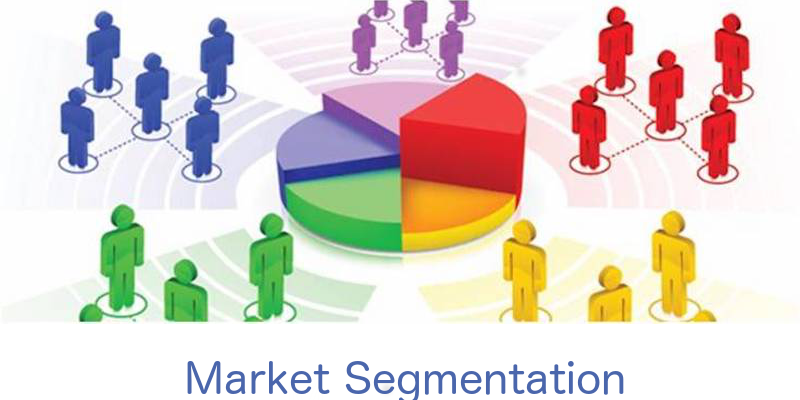

# **Importing required Library**

---



---



In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
 import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

## **Mounting Drive To Featch Data Set**

---



---


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Assign File Location**

---



---

In [ ]:
File_location="/content/drive/MyDrive/Capston projects/onlie retail customer segment/Online Retail.xlsx"
Data = pd.read_excel(File_location)

# **Checking shape of dataframe**

In [ ]:
Data.shape

(541909, 8)

# **Checking top 5 records**

In [ ]:
Data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
Data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# **Descriptive Statistics**

In [ ]:
Data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# **Checking number of unique values in each column**

In [ ]:
for col in Data.columns:
  print(col,':',Data[col].nunique())

InvoiceNo : 25900
StockCode : 4070
Description : 4223
Quantity : 722
InvoiceDate : 23260
UnitPrice : 1630
CustomerID : 4372
Country : 38


# **Feature Engineering -: Handling missing value,Null value**

---



---



# **1.Missing data counts and percentage**

In [ ]:
missing = Data.columns[Data.isnull().any()].tolist()
print('Count of Missing Data ')
print(Data[missing].isnull().sum().sort_values(ascending = False))
print('--'*12)
print(' Percentage of Missing Data')
print(round(Data[missing].isnull().sum().sort_values(ascending = False)/len(Data)*100,2))

Count of Missing Data 
CustomerID     135080
Description      1454
dtype: int64
------------------------
 Percentage of Missing Data
CustomerID     24.93
Description     0.27
dtype: float64


In [ ]:
#Dropping the rows with nulls
Data.dropna(inplace=True)

# **2.Checking duplicates**

In [ ]:
print(len(Data[Data.duplicated()]))

5225


In [ ]:
# Dropping duplicate rows
Data.drop_duplicates(inplace=True)

# **3.New Shape**

In [ ]:
Data.shape

(401604, 8)

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB




---



---


# **Data Feature Engineering**

---



---



**1.Creating new features from the datetime column InvoiceDate**

In [1]:
dataset["year"]  = dataset["InvoiceDate"].apply(lambda x: x.year)
dataset['Month'] = dataset['InvoiceDate'].apply(lambda x: x.month_name())
dataset['Day']   = dataset['InvoiceDate'].apply(lambda x: x.day_name())
dataset["hour"]  = dataset["InvoiceDate"].apply(lambda x: x.hour)

NameError: ignored